## Introduction to medical image processing

### <nii\>

This is one of popular data format for medical images. it contains header, affine and data in each file.

### ITK-SNAP

This is a common free software for inspect nii files, developed by UPenn.

http://www.itksnap.org/pmwiki/pmwiki.php

### nibabel

This is a common library for read and write nii files. If conda environment is used, it can be installed by:

conda install -c conda-forge nibabel 

### How to read nii files

Assume we have a t1.nii in the folder

In [10]:
import glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

filepath = "./t1.nii"

In [11]:
# Load a nii file
nii_file = nib.load(filepath)

In [12]:
# Display affine/header of this nii file
print(nii_file.affine)
print(nii_file.header)

[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoff

In [14]:
# Load data to numpy array
nii_data = nii_file.get_fdata()
print(type(nii_data))
print(nii_data.shape)

<class 'numpy.memmap'>
(240, 240, 155)


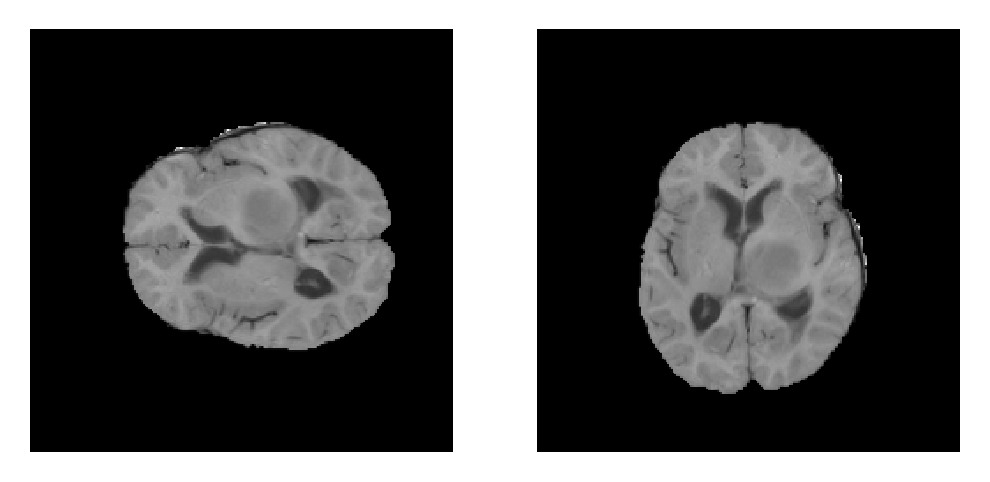

In [21]:
# Now we have a 240*240*155 3d image
fig = plt.figure(figsize=(4,2), dpi=300)

plt.subplot(121)
img = nii_data[:, :, 75]
plt.imshow(img, cmap='gray')
plt.axis("off")

# And rotate it if needed
plt.subplot(122)
img = nii_data[:, :, 75]
plt.imshow(np.rot90(img, 3), cmap='gray')
plt.axis("off")

# Save it
plt.savefig("test.jpg")

### Plugin our own data into this nii file

In [31]:
# The new data should be the same shape of orginal data
our_data = np.random.randint(0, 500, nii_data.shape) + nii_data
print(our_data.shape)

(240, 240, 155)


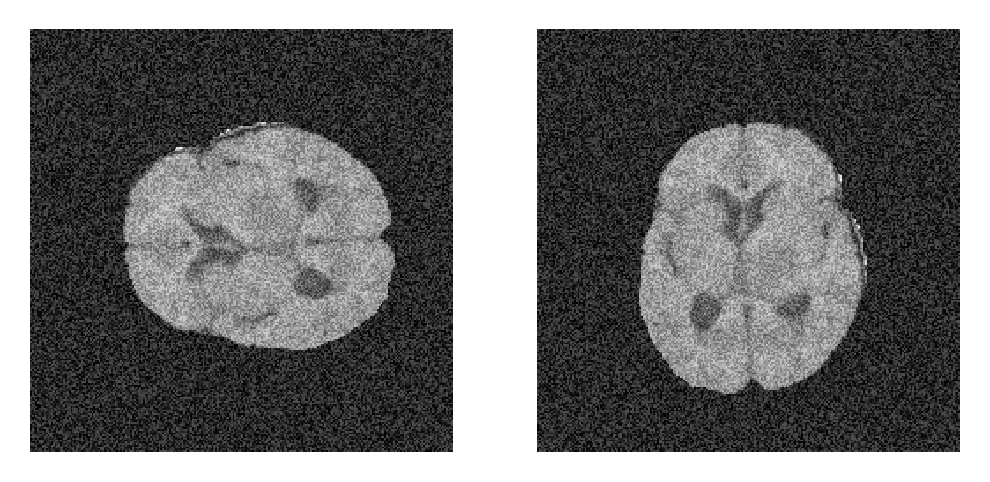

In [32]:
# Have a look on our new data
fig = plt.figure(figsize=(4,2), dpi=300)

plt.subplot(121)
img = our_data[:, :, 75]
plt.imshow(img, cmap='gray')
plt.axis("off")

# And rotate it if needed
plt.subplot(122)
img = our_data[:, :, 75]
plt.imshow(np.rot90(img, 3), cmap='gray')
plt.axis("off")

# Save it
plt.savefig("our_data.jpg")

In [33]:
# Plugin data
nii_file = nib.Nifti1Image(our_data, nii_file.affine, nii_file.header)
nib.save(nii_file, 'our_data.nii')

### And you can find a new nii file with our new data